In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings('ignore')

In [2]:

# ref: https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout/discussion/360236#2004730
def gaussian_kernel(length: int, sigma: int = 3) -> np.ndarray:
    x = np.ogrid[-length : length + 1]
    h = np.exp(-(x**2) / (2 * sigma * sigma))  # type: ignore
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    return h


def gaussian_label(label: np.ndarray, offset: int, sigma: int) -> np.ndarray:
    num_events = label.shape[1]
    for i in range(num_events):
        label[:, i] = np.convolve(label[:, i], gaussian_kernel(offset, sigma), mode="same")

    return label

In [7]:
def plot_label(offset, sigma):
    label = np.zeros((200, 3))
    label[100, 1] = 1
    # label[300, 2] = 1
    glabel = gaussian_label(label, offset=offset, sigma=sigma)
    sns.lineplot(glabel[:, 1])
    # sns.lineplot(glabel[:, 2])
    plt.show()

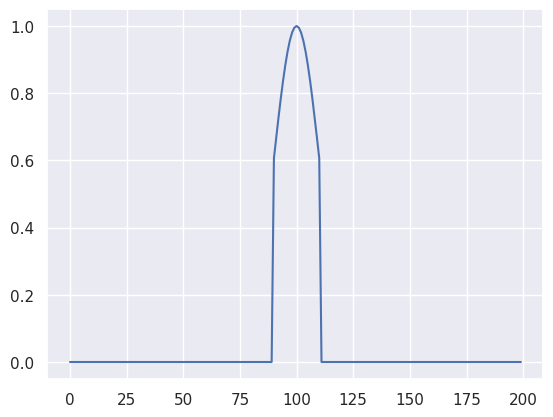

In [8]:
plot_label(offset=10, sigma=10)

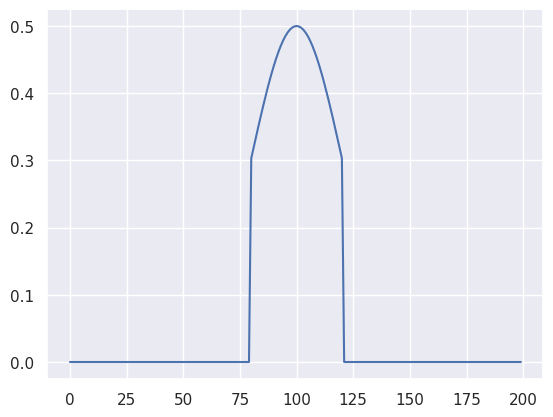

In [5]:
plot_label(offset=20, sigma=20)

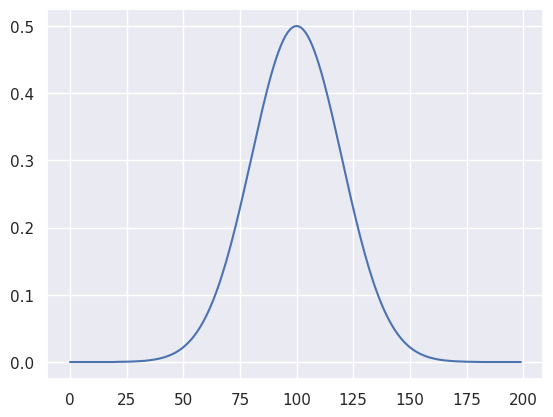

In [6]:
plot_label(offset=80, sigma=20)

In [61]:
def laplace_kernel(length: int, scale: int = 3) -> np.ndarray:
    x = np.ogrid[-length : length + 1]
    h = np.exp(-abs(x) / scale)
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    return h

def laplace_label(label: np.ndarray, offset: int, scale: int) -> np.ndarray:
    num_events = label.shape[1]
    for i in range(num_events):
        label[:, i] = np.convolve(label[:, i], laplace_kernel(offset, scale), mode="same")

    return label

def plot_label_laplace(offset, scale):
    label = np.zeros((200, 3))
    label[100, 1] = 1
    # label[300, 2] = 1
    glabel = laplace_label(label, offset=offset, scale=scale)
    sns.lineplot(glabel[:, 1])
    # sns.lineplot(glabel[:, 2])
    plt.show()

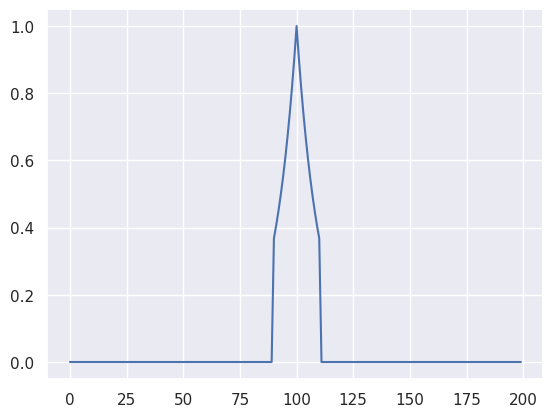

In [63]:
plot_label_laplace(offset=10, scale=10)

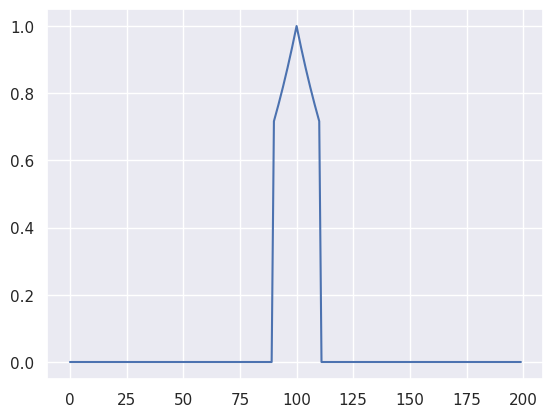

In [76]:
plot_label_laplace(offset=10, scale=30)